In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_true=pd.read_csv('/content/drive/MyDrive/Fake News Detection/True.csv')
df_fake=pd.read_csv('/content/drive/MyDrive/Fake News Detection/Fake.csv')

In [7]:
df_fake['label'] = 0
df_true['label'] = 1

df_combined = pd.concat([df_fake, df_true])
df_combined = df_combined.sample(frac=1).reset_index(drop=True)

df_combined.head()

,title,text,subject,date,label
0,"CULT CRIMES, MASS SHOOTINGS & MEDIA MIND CONTR...",Shawn Helton 21st Century WireThe 1994 cult fi...,Middle-east,"August 13, 2016",0
1,Mulvaney says no plans to fire U.S. consumer b...,"WASHINGTON (Reuters) - Mick Mulvaney, White Ho...",politicsNews,"December 4, 2017",1
2,Trump Faces Off With CNN’s Jake Tapper Over Ev...,21st Century Wire says After last Friday night...,US_News,"March 14, 2016",0
3,BREAKING: HILLARY CAMP Looking To Challenge Vo...,Reports from several sources revealed on Novem...,politics,"Nov 22, 2016",0
4,Trump budget opens new fight among Republicans,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,"March 13, 2017",1


In [9]:
df_combined['content'] = df_combined['title'] + " "+ df_combined['text']
df_combined = df_combined[['content','label']]
df_combined.head()

,content,label
0,"CULT CRIMES, MASS SHOOTINGS & MEDIA MIND CONTR...",0
1,Mulvaney says no plans to fire U.S. consumer b...,1
2,Trump Faces Off With CNN’s Jake Tapper Over Ev...,0
3,BREAKING: HILLARY CAMP Looking To Challenge Vo...,0
4,Trump budget opens new fight among Republicans...,1


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    cleaned_words = [stemmer.stem(word) for word in words if word not in stop_words]

    return ' '.join(cleaned_words)


In [12]:
df_combined['cleaned_content'] = df_combined['content'].apply(clean_text)
df_combined.head()

<ipython-input-12-31a6800c0829>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['cleaned_content'] = df_combined['content'].apply(clean_text)


,content,label,cleaned_content
0,"CULT CRIMES, MASS SHOOTINGS & MEDIA MIND CONTR...",0,cult crime mass shoot media mind control natur...
1,Mulvaney says no plans to fire U.S. consumer b...,1,mulvaney say plan fire us consum bureau englis...
2,Trump Faces Off With CNN’s Jake Tapper Over Ev...,0,trump face cnn jake tapper event fistacuff st ...
3,BREAKING: HILLARY CAMP Looking To Challenge Vo...,0,break hillari camp look challeng votesuspect i...
4,Trump budget opens new fight among Republicans...,1,trump budget open new fight among republican w...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df_combined['cleaned_content']).toarray()
y = df_combined['label']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_rf = rf.predict(X_test)

print("RF Classification Report:")
print(classification_report(y_test, y_pred_rf))

RF Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4749
           1       1.00      1.00      1.00      4231

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



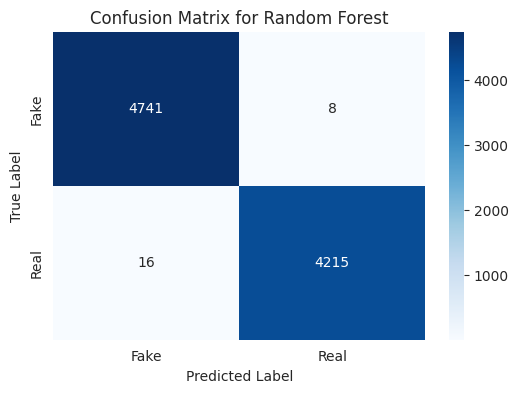

In [58]:
cm = confusion_matrix(y_test, y_pred_rf)
labels = ['Fake', 'Real']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [42]:
y_pred_svm = svm.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4749
           1       0.99      0.99      0.99      4231

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



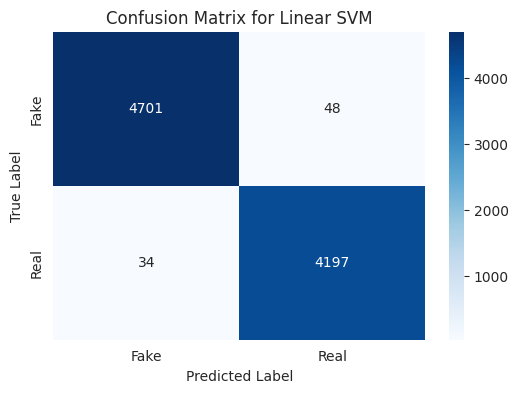

In [57]:
cm2 = confusion_matrix(y_test, y_pred_svm)
labels = ['Fake', 'Real']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Linear SVM')
plt.show()

In [40]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4749
           1       0.91      0.92      0.91      4231

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980



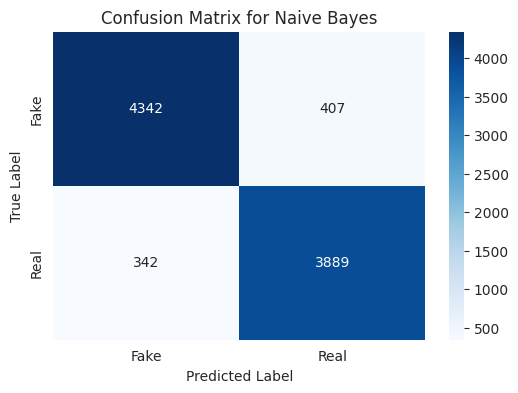

In [56]:
cm3 = confusion_matrix(y_test, y_pred_nb)
labels = ['Fake', 'Real']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

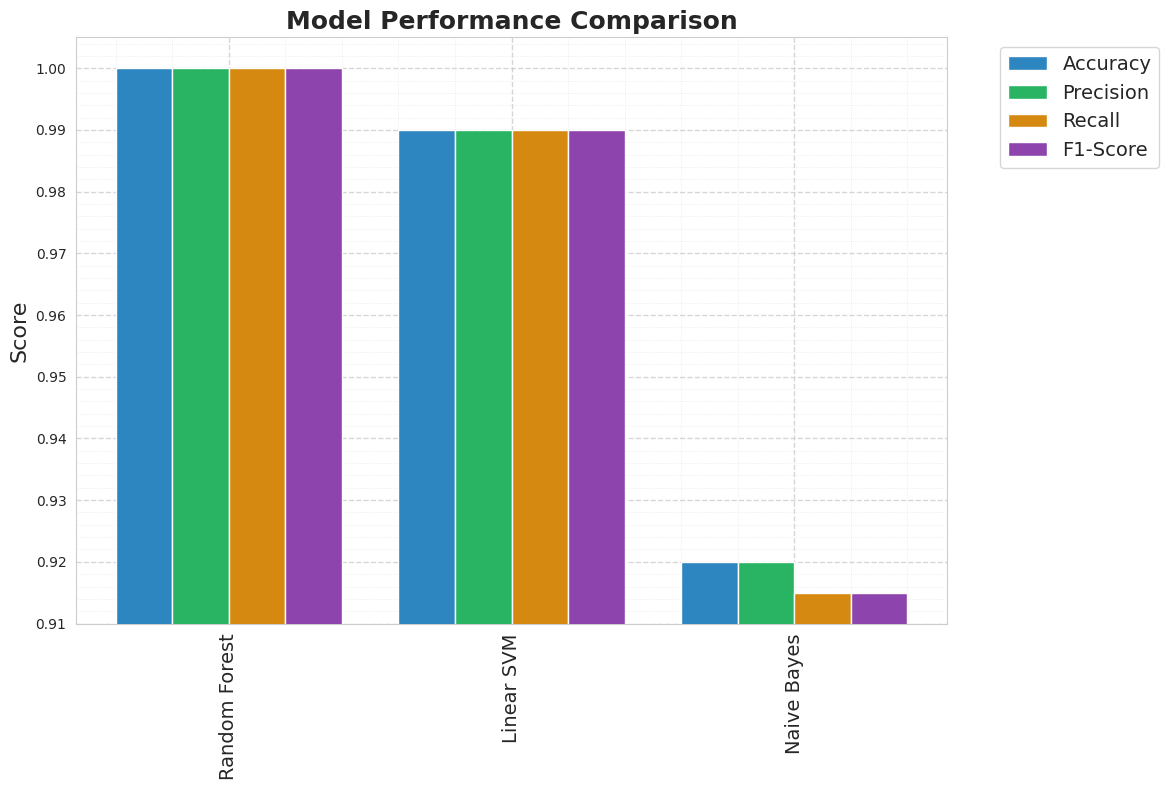

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
models = ['Random Forest', 'Linear SVM', 'Naive Bayes']

accuracy = [1.00, 0.99, 0.92]
precision = [(1.00 + 1.00) / 2, (0.99 + 0.99) / 2, (0.93 + 0.91) / 2]
recall = [(1.00 + 1.00) / 2, (0.99 + 0.99) / 2, (0.91 + 0.92) / 2]
f1 = [(1.00 + 1.00) / 2, (0.99 + 0.99) / 2, (0.92 + 0.91) / 2]

metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#2E86C1', '#28B463', '#D68910', '#8E44AD']

x = np.arange(len(models))
width = 0.2

# Style
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(14, 8))

# Bars
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i*width - 1.5*width, metric, width, label=metric_names[i], color=color, zorder=3)

# Axis settings
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90, fontsize=14)
ax.set_ylabel('Score', fontsize=16)
ax.set_ylim(0.91, 1.005)
ax.set_yticks(np.arange(0.91, 1.01, 0.01))
ax.set_title('Model Performance Comparison', fontsize=18, weight='bold')

# Grid lines
ax.set_axisbelow(True)
ax.grid(which='major', axis='both', linestyle='--', linewidth=1, alpha=0.8)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

# Legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=14)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
